In [5]:
import pandas as pd
import pyscf
import pyscf.cc
import scipy.spatial.transform as sst
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def test_case_pyscf(coords):
    #mol = pyscf.gto.M(atom='C 0 0 0; O 0 0 1.1', basis='6-31G')
    mol = pyscf.gto.Mole()
    mol.atom = (('N', coords[0, :]), ('N', coords[1, :]))
    mol.basis = '6-31G'
    mol.build()
    mf = pyscf.scf.RHF(mol).run()
    mycc = pyscf.cc.CCSD(mf).run()
    dm1 = mycc.make_rdm1()
    
    dm1_ao = np.einsum('pi,ij,qj->pq', mf.mo_coeff, dm1, mf.mo_coeff.conj())
    
    # Analytical evaluation
    res = []
    for site in (0, 1):
        q = mol._atm.copy()
        q[site, 0] = 0
        a = pyscf.gto.getints('int1e_nuc_sph', q, mol._bas, mol._env)
        res.append(np.matmul(a, dm1_ao).trace())
    
    return res
    
#test_case_pyscf()

In [26]:
def scan():
    results = []
    for fraction in np.linspace(0, 1, 20):
        coords = np.array(((0,0,0), (0,0,1.)))
        normal = np.array((0,1., 0))
        coords = coords - coords.mean(axis=0)
        R = sst.Rotation.from_rotvec(normal*(2*np.pi)*fraction)
        q = R.apply(coords)
        res = test_case_pyscf(q)
        results.append({'fraction': fraction, 'site1': res[0], 'site2': res[1]})
    return pd.DataFrame(results)
df = scan()

converged SCF energy = -112.610824522466
E(CCSD) = -112.8015135991042  E_corr = -0.1906890766377091
converged SCF energy = -112.610824522466
E(CCSD) = -112.8015135995251  E_corr = -0.1906890770586138
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015135988801  E_corr = -0.1906890764134838
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015135989253  E_corr = -0.1906890764587289
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015135988935  E_corr = -0.1906890764268366
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015136007814  E_corr = -0.1906890783148892
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015135990321  E_corr = -0.1906890765655261
converged SCF energy = -112.610824522466
E(CCSD) = -112.8015135988785  E_corr = -0.1906890764120482
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015135988897  E_corr = -0.1906890764232326
converged SCF energy = -112.610824522467
E(CCSD) = -112.8015135996276  E_corr = -0.1906890771609568


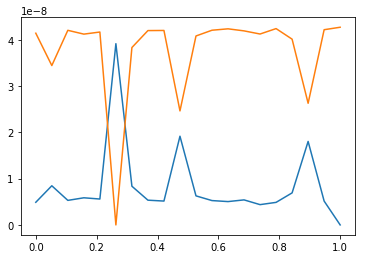

In [27]:
plt.plot(df.fraction, df.site1-min(df.site1))
plt.plot(df.fraction, df.site2-min(df.site2))

In [29]:
df_N2 = scan()

converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571114283  E_corr = -0.2066205406538965
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571112849  E_corr = -0.2066205405105967
converged SCF energy = -108.835236570774
E(CCSD) = -109.041857111413  E_corr = -0.2066205406385127
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571113825  E_corr = -0.2066205406081102
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571114725  E_corr = -0.2066205406980332
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571114635  E_corr = -0.2066205406892015
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571113754  E_corr = -0.2066205406008962
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571114406  E_corr = -0.2066205406661543
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571114655  E_corr = -0.2066205406910331
converged SCF energy = -108.835236570774
E(CCSD) = -109.0418571112299  E_corr = -0.2066205404554946
c

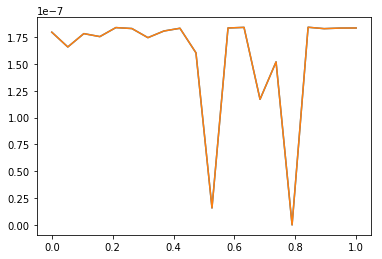

In [30]:
plt.plot(df_N2.fraction, df_N2.site1-min(df_N2.site1))
plt.plot(df_N2.fraction, df_N2.site2-min(df_N2.site2))

In [32]:
df_N2.site2 - df_N2.site1

0     2.842171e-13
1     1.136868e-13
2     8.526513e-14
3    -5.684342e-14
4     8.526513e-14
5    -8.526513e-14
6     0.000000e+00
7     0.000000e+00
8    -8.526513e-14
9     1.136868e-13
10   -2.842171e-14
11    5.684342e-14
12   -2.842171e-14
13   -5.684342e-14
14    1.989520e-13
15    5.684342e-14
16    2.842171e-14
17   -8.526513e-14
18   -2.842171e-14
19    1.136868e-13
dtype: float64